In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Lecture 8:

-  more about **matplotlib**:  adding notes and saving images

-  about DataFrames and Series, two new _data structures_, that are part of the **Pandas** package 

-  some basic filtering tricks with **Pandas**

-  how to read in and save data files with **Pandas**



### More tricks in matplotlib.   

A few lectures ago we read in the record of an earthquake and plotted it: 

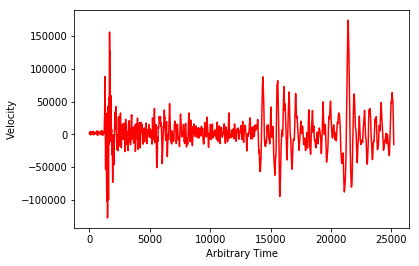

In [2]:
EQ=np.loadtxt('Datasets/seismicRecord/earthquake.txt') # read in data
plt.plot(EQ,'r-') # plots as a red line
plt.xlabel('Arbitrary Time') # puts a label on the X axis
plt.ylabel('Velocity'); # puts a label on the Y axis

There are a few things that can be improved about this plot:

1) What are the  time units?  

2) Seismologists can recognize the arrival of different phases, including the "P" wave (for primary) and the "S" wave (for secondary or also shear).   It would be nice to label the P and S wave arrivals. 

So let's start with point one, converting the arbitrary time units to minutes. 

The measurement rate of this seismometer was 20 measurements per second. Let's convert this to minutes.  First we'll need to create a data structure (say, an array) of the original "arbitrary time" and then convert "arbitrary time"  to minutes by dividing by 1200 (the number of seconds in 20 minutes):

$20{\hbox{measurements}\over {\hbox{second}}} \times 60 {\hbox{second}\over {\hbox{minute}}} =1200 {\hbox{measurements}\over {\hbox{minute}}}$.

To create a data structure of 'arbitrary time' with the same length as the original array, we can use the _built-in_ **len( )** function which gives us the length of a list or a 1D array, then use **np.arange( )** to give us an array from 0 to the length of the array.  Because it is an array (and not a list), we can divide the whole array  by 1200 to create a new array that is in minutes.  
We can then plot the minutes on the $x$-axis and the velocities on the $y$-axis:





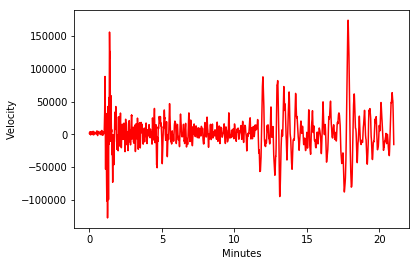

In [8]:
velocity=np.loadtxt('Datasets/seismicRecord/earthquake.txt') # read in data
# remember np.arange?  it makes an array that is N long.
# here, we want N to be the length of the acceleration array, so len(acceleration)
time_units=np.arange(len(velocity)) # makes an array of arbitrary time units
# now I want an array that is normalized to minutes: 
minutes=time_units/1200. # sampling rate=20/sec = 1/1200 minutes
# the plt.plot method can plot X, versus Y with plt.plot(X,Y), so:
plt.plot(minutes,velocity,'r-') # plots X=Minutes, Y= velocity as a red line
# we can change the labels to reflect the new reality:
plt.xlabel('Minutes') # puts a label on the X axis
plt.ylabel('Velocity'); # puts a label on the Y axis


There is something you should notice in the above script. 

Did you see you we just took the **time_units** array and divided it by 1200?  1200 is  a scalar, so each element is divided by 1200.  Try that with a list! As we did a few lectures ago, we can make a list with **range( )** that is very similar to time_units but a list, not an **NumPy** array, but if we try to divide it by scalar, we get an error! 

In [3]:
list_of_units= range(360)
list_of_units/1200.

TypeError: unsupported operand type(s) for /: 'range' and 'float'

As mentioned before, this  is one big advantage of arrays over lists.   

### Saving plots and applying  notes 

Saving turns out to be easy with the **plt.savefig( )** method.  The argument is the desired filename (including any directory names if desired).  

It would also be handy to label the 'P' and 'S' wave arrivals.  You may remember that the first wave that hits a station is the 'P' wave (for primary).  The second wave is the 'S' wave (for secondary).  P waves are 'compressional' waves, while the S waves are 'shear' waves. They are a bit slower, which is why they arrive second.  So, let's label the arrivals in our plot.

To put notes on a figure, we use **plt.text( )** which has many options. Check out this web site for hints on making beautiful notes:  

http://matplotlib.org/users/text_props.html

So the keyword arguments we want are _rotation_ which allows us to rotate the note by some angle (say, 90), and the vertical (_verticalalignment_ or _va_)	and horizontal (_horizontalalignment_ or _ha_) alignments with respect to the x and y values given.  

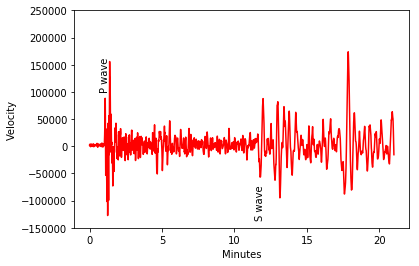

In [10]:
# same plot as before: 
plt.plot(minutes,velocity,'r-') # plots as a red line
plt.xlabel('Minutes') # puts a label on the X axis
plt.ylabel('Velocity') # puts a label on the Y axis
# here I add a few more decorations with the plt.text method
plt.text(1.08,100000, "P wave",rotation=90,va='bottom',ha='center') # put on the P wave label
plt.text(11.76,-70000, "S wave",rotation=90,va='top',ha='center') # put on the S wave label
plt.ylim([-150000,250000]) # increase vertical axis bounds to include S wave label
plt.savefig('seismogram.png') # let's just save this as a png file.

### Let's do some seismology!

The farther away an earthquake is from a receiver, the more time there is between the arrivals of the P and S waves.  This makes sense if you think about racing a little kid (who is on a tricycle) around a track.  The distance between you will just keep increasing as you run because the kid on the trike is slower (like the S wave). [Well, until you lap the little tyke.] 

You can use the difference between the arrival times of the two waves to calculate the distance to the earthquake source, if we know the velocities of the waves through the Earth.  So first we need to know how these two waves behave.  

There are plenty of data on earthquakes and the arrival times of different waves. Here is a short video demonstration. 

https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created

(click on the video the right).  



Now we can look at some data from the model for the Earth.  I  found the data we need on this website:  https://earthquake.usgs.gov/learn/topics/ttgraph.php and saved it in Datasets/TravelTimeDelta/DeltaTime.txt  

Let's take a look at the contents of the file.  Here we need to learn another Unix command,  **head** (remember that we should  pre-pend a ! to run it in the notebook).  The command **head** prints out the first 10 lines in a file.  

In [25]:
!head Datasets/TravelTimeDelta/DeltaTime.txt

https://earthquake.usgs.gov/learn/topics/ttgraph.php
Delta Time of P  S-P Time
  Deg   M   S     M   S
  0.0   0   5.4   0   4.0
  0.5   0  10.6   0   7.8
  1.0   0  17.7   0  13.5
  1.5   0  24.6   0  19.0
  2.0   0  31.4   0  24.4
  2.5   0  38.3   0  29.9
  3.0   0  45.2   0  35.4


While we are at it, we can look at the last 10 lines with **tail**.  

In [26]:
!tail Datasets/TravelTimeDelta/DeltaTime.txt

 96.0  13  23.6  11  16.1
 97.0  13  28.1  11  20.1
 98.0  13  32.6  11  24.1
 99.0  13  37.0  11  28.1
100.0  13  41.5  11  32.0
101.0  13  45.9  11  35.8
102.0  13  50.4  11  39.7
103.0  13  54.8  11  43.6
104.0  13  59.2  11  47.5
105.0  14   3.7  11  51.4


The first line in our dataset contains WORDS, so we can't read it in with **np.loadtxt**.  One strategy to remove the text would be to edit the text file, but instead let's up our game and use the wonderful **Pandas** package -  a useful recent addition to  Python.  



### The Joy of Pandas

Pandas is a relatively new package for Python.  It allows us to read in more complicated data file formats than **NumPy**, and  wrangle the data in powerful ways. It also provides many useful data analysis tools.

There are two basic data structures in **Pandas**, the **DataFrame**, which is basically a spreadsheet with multiple columns and the **Series** which is a single column of data. A **Series** is like a list on steroids. 

The DeltaTime file includes the website where I got the original data at the top of the file, a description in line 2 of what the data are about in general, and then some column headers in line 3.  This kind of file does not play nicely with **np.loadtxt( )**,  but we can use the **Pandas** function, **read_csv( )** to read in the datafile.  This function not only reads in 'comma separated variable' files (.csv), but also other data formats once we tell it how the file is delimited.  

Of course we must first import **Pandas** into the notebook:

In [3]:
import pandas as pd

A few things you need to let **Pandas** know.  

- We need to skip the first two rows. We use the keyword argument **skiprows=2** to do that. 
- **pd.read_csv( )** reads 'comma separated variables' by default but this file is _whitespace_ delimited. _whitespace_ is either spaces or tabs.   The keyword argument **delim_whitespace=True** will split on white space.
- the _header_ is in the third row; this is the row with the column names in it.  Python starts counting from zero,  but we skipped two rows, so **header=0** will read in the first  row  after the skipped rows as the header. 
- fun fact:  with skiprows we don't need the header statement, but you need to know what it is.  For example, you could use **header=2** instead of **skiprows**.  Why 2?  because **header** starts with 0 as the default.   



In [4]:
DeltaTimeData=pd.read_csv('Datasets/TravelTimeDelta/DeltaTime.txt',\
                          delim_whitespace=True,skiprows=2,header=0)
# we specify the path of the file (relative to our current directory), 
# then all the other arguments.
DeltaTimeData.head() # this is "panda-ish" for looking at the "head" of the object we read in.    

,Deg,M,S,M.1,S.1
0,0.0,0,5.4,0,4.0
1,0.5,0,10.6,0,7.8
2,1.0,0,17.7,0,13.5
3,1.5,0,24.6,0,19.0
4,2.0,0,31.4,0,24.4


**DeltaTimeData** is now a Pandas **DataFrame**.  

So what is a **DataFrame**?   It is a new data structure that is more sophisticated than any we have learned about so far (lists, tuples, sets, dictionaries, arrays).   
It has named columns (like an Excel spreadsheet) and identifies the rows by _indices_ starting with 0. 

The file we read in included column headers and Pandas knows which line they were in (with the header or skiprows arguments).  

If we want to be sure, we can use the **DataFrame.columns** attribute on the DeltaTimeData DataFrame:


In [13]:
DeltaTimeData.columns

Index(['Deg', 'M', 'S', 'M.1', 'S.1'], dtype='object')

Notice that a DataFrame is of type _object_, similar to one of the **NumPy** array types that mixed data types we briefly encountered before. Let's explore these objects with Pandas DataFrames.  

We see that the  columns of **DeltaTimeData**  are: 
- "Deg": the degrees away from the source (the angle from the center of the Earth)
- "M": the time of the P wave arrival in minutes
- "S": the  P wave arrival in seconds
- "M.1": the difference in the P and S wave arrival time in  minutes and 
- "S.1" is same interval in seconds.  

Each one of these columns is a **Pandas Series.**  So, DataFrames are like Excel spreadsheets and Series are one column of the spreadsheet.  

If we like (and I do), we can change the column names by setting **DataFrame.columns** to a list with the new (more meaningful) column names: 

In [14]:
DeltaTimeData.columns=['Degrees','P_wave_minutes',\
                       'P_wave_seconds','S-P_minutes','S-P_seconds']
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds
0,0.0,0,5.4,0,4.0
1,0.5,0,10.6,0,7.8
2,1.0,0,17.7,0,13.5
3,1.5,0,24.6,0,19.0
4,2.0,0,31.4,0,24.4


To save a DataFrame to a file, we use the **to_csv** method: 

In [17]:
DeltaTimeData.to_csv('PSArrival.csv', index=False)

Without the argument **index=False**, there is an annoying extra column with all the DataFrame's index numbers, with **index** set to False, these do not appear.  You can check it out with excel or something.  

Also, there are many other file formats besides 'comma separated variable' (.csv) which can be saved using the **sep** argument.  **sep** stands for "separator".   For example, sep='\t' makes it a tab delimited (separated) file: 

In [15]:
DeltaTimeData.to_csv('PSArrival.txt',sep='\t', index=False)

### Back to the science

What we really want for our "science" problem is the arrival time in decimal minutes, not  minutes and seconds as in this data file.  We can do this by defining a new column ("P_min"), converting the seconds data to decimal minutes (by dividing by 60) and add that to the minutes: 

In [18]:
DeltaTimeData['P_decimal_minutes']=DeltaTimeData['P_wave_minutes']\
        +DeltaTimeData['P_wave_seconds']/60.
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000
1,0.5,0,10.6,0,7.8,0.176667
2,1.0,0,17.7,0,13.5,0.295000
3,1.5,0,24.6,0,19.0,0.410000
4,2.0,0,31.4,0,24.4,0.523333


Notice how we have a new column which is the decimal minutes after the Earthquake that the P wave arrived at that angular distance (Deg).   



In [19]:
DeltaTimeData.columns

Index(['Degrees', 'P_wave_minutes', 'P_wave_seconds', 'S-P_minutes',
       'S-P_seconds', 'P_decimal_minutes'],
      dtype='object')

We would also like the time of S wave arrival, rather than the time between the S and P wave arrivals

In [20]:
DeltaTimeData['SP_decimal_minutes']=DeltaTimeData['S-P_minutes']+\
             DeltaTimeData['S-P_seconds']/60. # convert delay time to decimal minutes
DeltaTimeData['S_decimal_minutes']=DeltaTimeData['P_decimal_minutes']+\
           DeltaTimeData['SP_decimal_minutes'] # calculate S wave arrival time in minutes
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes,SP_decimal_minutes,S_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000,0.066667,0.156667
1,0.5,0,10.6,0,7.8,0.176667,0.130000,0.306667
2,1.0,0,17.7,0,13.5,0.295000,0.225000,0.520000
3,1.5,0,24.6,0,19.0,0.410000,0.316667,0.726667
4,2.0,0,31.4,0,24.4,0.523333,0.406667,0.930000


OK.  Now we are ready to make a plot of our travel time and angular distances (just like in the movie!)

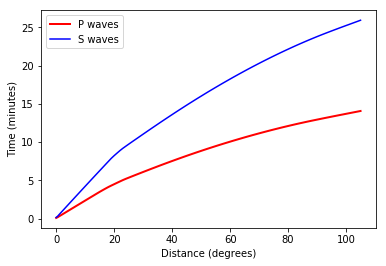

In [21]:
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.P_decimal_minutes,'r-',label='P waves',linewidth=2)
        # plots the P wave arrival as red  lines
# notice the linewidth=2? that makes the line heavier.
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.S_decimal_minutes,'b-',label='S waves') 
        # plots the S wave arrival as blue lines
plt.xlabel('Distance (degrees)') # labels the x axis
plt.ylabel('Time (minutes)'); # labels the y axis
plt.legend(loc=2); # location 2 is in the upper left hand corner

Or we could plot the data as squares and triangles

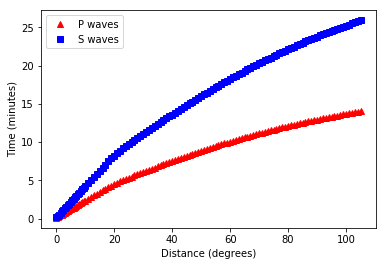

In [37]:
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.P_decimal_minutes,'r^',label='P waves')
        # plots the P wave arrival as red  triangles (^)
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.S_decimal_minutes,'bs',label='S waves') 
        # plots the S wave arrival as blue squares (s)
plt.xlabel('Distance (degrees)') # labels the x axis
plt.ylabel('Time (minutes)'); # labels the y axis
plt.legend(loc=2); # location 2 is in the upper left hand corner

Now we have two different symbols, red triangles and blue squares.  We used the **label** argument to  label the symbol types and then  use the **plt.legend( )** method to place the legend onto the figure.  



In the next lecture, we'll use this on real P and S wave arrival data.  We will calulate the time delay between the P and S wave arrival, find that time delay in our DeltaTimeData DataFrame, find the corresponding angular distance, and then calculate the actual great circle between the two points to help find the location of the source.  So stay tuned. :)  

Before we go, let's leave a nice data file to work on.  We can make a **DataFrame** of our earthquake data called **EQ**.

In [22]:
EQ=pd.DataFrame([minutes,velocity])
EQ.head()

,0,1,2,3,4,5,6,7,8,9,...,25190,25191,25192,25193,25194,25195,25196,25197,25198,25199
0,0.0,0.000833,0.001667,0.0025,0.003333,0.004167,0.005,0.005833,0.006667,0.0075,...,20.991667,20.9925,20.993333,20.994167,20.995,20.995833,20.996667,20.9975,20.998333,20.999167
1,1807.0,1749.000000,1694.000000,1618.0000,1516.000000,1394.000000,1282.000,1198.000000,1077.000000,957.0000,...,-9275.000000,-10063.0000,-10806.000000,-11515.000000,-12214.000,-12915.000000,-13599.000000,-14264.0000,-14888.000000,-15489.000000


Hmmm, that doesn't look like what we really need.  First, there are only two rows (minutes and velocity) and we want
two columns, not two rows.  To do that, we can transpose the **DataFrame**, just like a **NumPy** array:  

In [25]:
EQ=pd.DataFrame([minutes,velocity]).transpose()
EQ.head()

,0,1
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0


That is better, but we would really like column headers with names, not numbers so we change the column headers with the **column** attribute (as before).    

In [26]:
EQ.columns=['Minutes','Velocity']
EQ.head()

,Minutes,Velocity
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0


And we now we can  save our DataFrames as a file.  

In [27]:
EQ.to_csv('minutes_velocity.csv',index=None)
DeltaTimeData.to_csv('DeltaTimeData.csv',index=None)
# by setting index to None, we don't have the indices as a column in the datafile. 

Now we can safely leave this project until later.  


### Assignment #3
- Go to the IRIS website (US's national earthquake database, http://ds.iris.edu/ieb/index.html?format=text&nodata=404&starttime=1970-01-01&endtime=2025-01-01&minmag=0&maxmag=10&mindepth=0&maxdepth=900&orderby=time-desc&limit=1000&maxlat=89.18&minlat=-89.18&maxlon=180.00&minlon=-180.00&zm=1&mt=ter) and search for the last 10 earthquakes (set Max quakes to 10) and Priority to Newest). Click on "Apply".  Then click on Open: 'Other formats' and save the data to an Excel spreadsheet.  
- Open the Excel file in Excel and save it as a .csv file.
- Read this file into a Pandas DataFrame.
- Extract the latitudes,  longitudes and depths  as a **NumPy** array.  
- Make an XY plot with longitude on the horizontal axis and latitudes on the Y axis.  Use small red triangles as the symbols.  
- Label your axes.
- Save your figure as a .png file

In [35]:
# cleanup
!rm seismogram.png
!rm PSArrival.*  
# notice the * is a wildcard
# this command will delete anything that starts with PSArrival.
!rm minutes_velocity.csv # I already put this into Lecture 9 so don't worry.  